In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

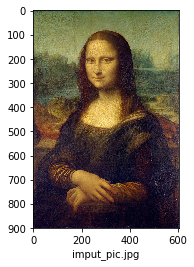

(900, 604, 3)

In [2]:
img = mpimg.imread("input_pic.jpg")
plt.imshow(img)
plt.xlabel("imput_pic.jpg")
plt.show()
img.shape

In [3]:
## (b)
# process data
# We do not need other preprocessing steps, since it has no effects on decision tree.
training, label = [], []
sampleNum = 5000
rowVector = img.shape[0]
colVector = img.shape[1]

points = list(itertools.product(range(0,rowVector), range(0,colVector)))

training = random.sample(points,sampleNum)

for i in range(sampleNum):
    label.append(img[training[i]])

label = np.array(label)

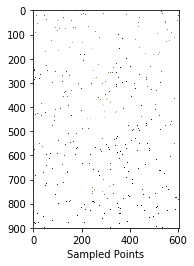

In [4]:
## (c) Maps (x,y) coordinates to (r,g,b)
sampledImg = np.zeros([rowVector,colVector,3], dtype=np.uint8)
sampledImg.fill(255)
for i in range(sampleNum):
    sampledImg[training[i][0]][training[i][1]] = label[i]
plt.imshow(sampledImg)
plt.xlabel("Sampled Points")
plt.show()

In [5]:
## (d)
def randomForest(numTree = 5, depth = None):
    forest = RandomForestRegressor(random_state=0, n_estimators = numTree, max_depth = depth)
    forest.fit(training, label)
    prediction = forest.predict(points) / 255.0
    prediction = prediction.reshape(rowVector,colVector, 3)
    return prediction

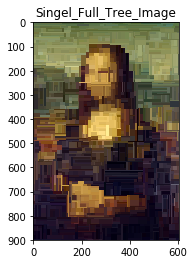

In [6]:
pred_full = randomForest(1)
plt.title('Singel_Full_Tree_Image')
plt.imshow(pred_full)
plt.show()

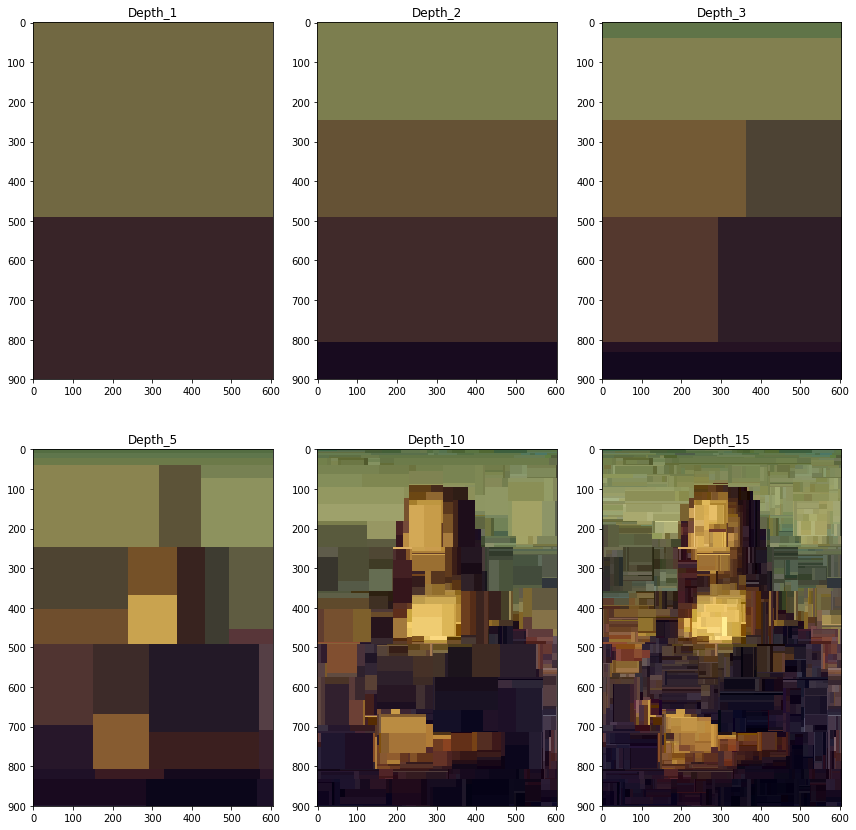

In [7]:
# e. experiment(i) single tree with different depth
depths = [1, 2, 3, 5, 10, 15]
plt.figure(figsize=[12, 12])
for index,d in enumerate(depths):
    prediction = randomForest(1, depth=d)
    plt.subplot(2,3,index+1)
    plt.title("Depth_" + str(d))
    plt.imshow(prediction)
plt.tight_layout()

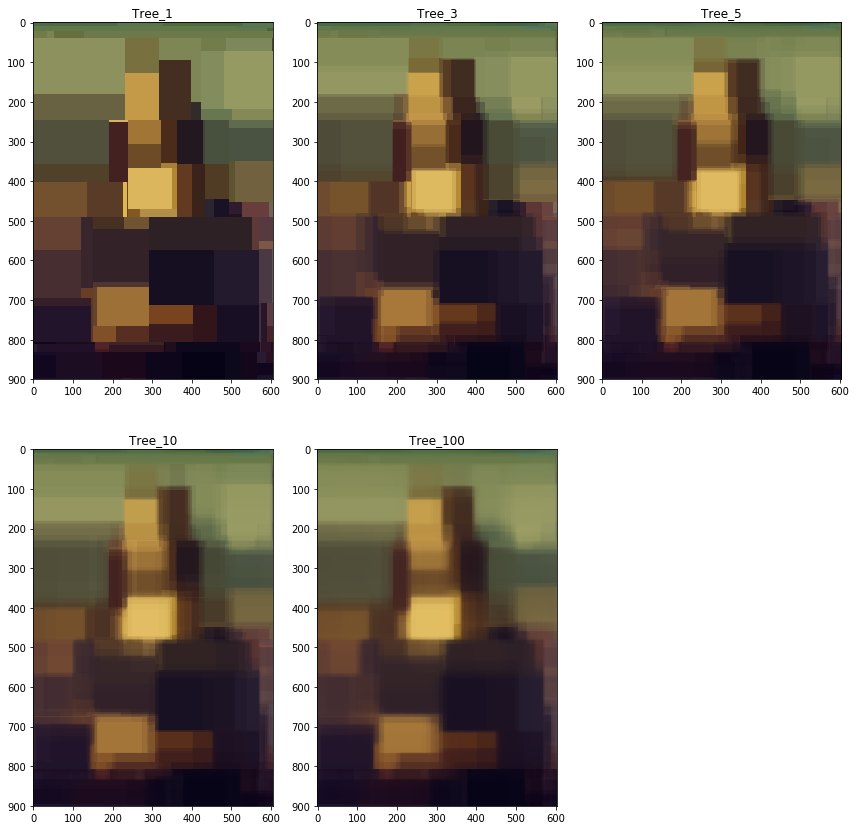

In [8]:
#experiment(ii), depth=7, with different number of trees
trees = [1, 3, 5, 10, 100]
plt.figure(figsize=[12, 12])
for index,tree in enumerate(trees):
    prediction = randomForest(numTree=tree, depth=7)
    plt.subplot(2,3,index+1)
    plt.title("Tree_" + str(tree))
    plt.imshow(prediction)
plt.tight_layout()

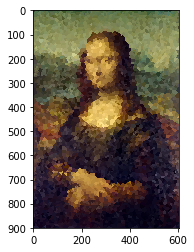

In [9]:
# experiment(iii) KNN-regressor, for k = 1
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(training, label)
pred = knn.predict(points).reshape(rowVector,colVector,3)/255.0

plt.imshow(pred)
plt.show()

In [10]:
#experiment(iv), depth=7, with different min_samples_leaf

def randomForest_pruning(numTree = 5, depth = None, min_samples_leaf = 1):
    forest = RandomForestRegressor(random_state=0, n_estimators = numTree, max_depth = depth, min_samples_leaf = min_samples_leaf)
    forest.fit(training, label)
    prediction = forest.predict(points) / 255.0
    prediction = prediction.reshape(rowVector,colVector, 3)
    return prediction

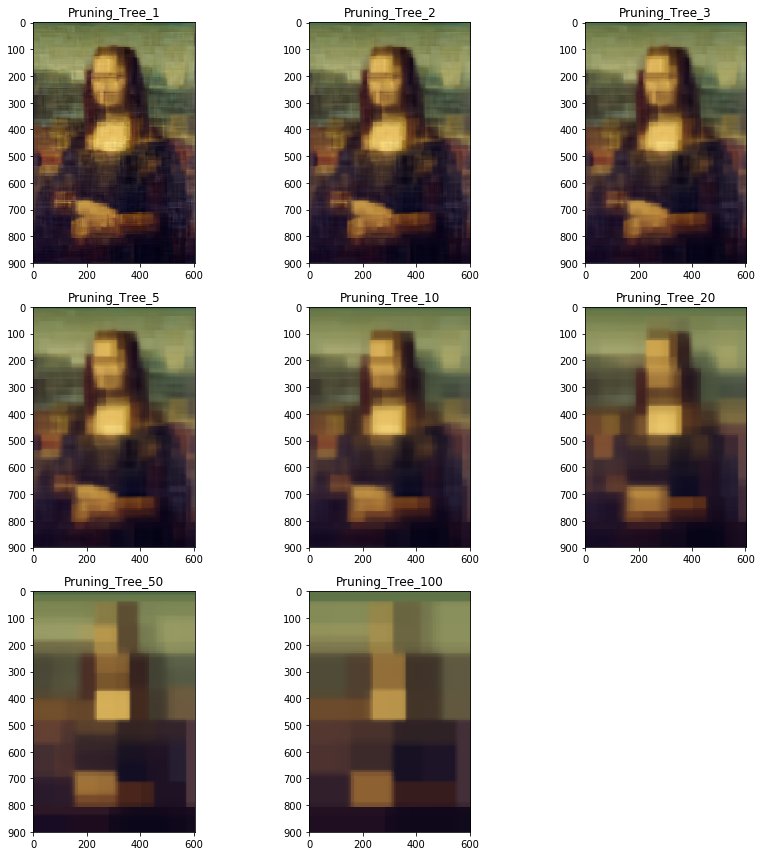

In [11]:
min_samples_leaf_list = [1, 2, 3, 5, 10, 20, 50, 100]

plt.figure(figsize=[12, 12])
for index,min_samples_leaf in enumerate(min_samples_leaf_list):
    prediction = randomForest_pruning(numTree=tree, depth=30, min_samples_leaf=min_samples_leaf)
    plt.subplot(3,3,index+1)
    plt.title("Pruning_Tree_" + str(min_samples_leaf))
    plt.imshow(prediction)
plt.tight_layout()